
# Assignment 4 

Synthesizer software emulation and implementing research papers 
--------------------------------------------------------------- 

This assignment comes in three versions. The first version focuses on real-time implementation and software simulation of an existing synthesizer (the Yamaha DX21) and is heavier in terms of programming. The other two versions look at the implementation of some synthesis techniques from research papers and are more focused on coding and presenting algorithms so they less heavy in terms of programming but requires more math understanding. The expected answer for versions 2 and 3 is not expected to be real-time and is expected to be a Python/Jupyter notebook. It will be easier if you work on one version or the other but if you decide to mix questions that is fine. As usual I will use the term familiar programming 
language to refer to the ones that you probably have encountered during your  studies: Python, C, C++, Java, and Javascript. As you probably can guess I will use the term unfamiliar programming language to refer to any other programming language such as: Haskell, OCaml, Prolog, Rust, Go, Julia, Ruby, C#, F#
R, etc. I will use the term computer music textual languages to refer to languages 
that have extensive support and primitives for sound and music manipulation such as 
Chuck, Supercollider, Csound, Nyquist, and Faust and visual programming languages 
for languages such as PureData and Max/MSP. 

Unless explicitly stated you can use any programming languages for implementing 
the questions. Using a computer music language moves the degree of difficulty down and using an unfamiliar programming language moves it up. For example if you implement question 6 in Max/MSP or Chuck it counts as basic rather than expected. If you implement question 6 in an unfamiliar programming languages it can count as advanced. In general, I am flexible so if you want to adjust things just let me know. Also if you 
think of a question of comparable difficulty that you would like do again let me know and most likely 
it should be ok. 

If you need access to devices ask me via email or through Discord for access to ECS602. 

Fee free to suggest your own versions that follow a similar structure. For example if you have a different synthesizer that you would like to emulate using software - you can come up with similar questions to version 1 or if you find a paper you would like to implement you can come up with similar questions to version 2 and 3. 

## VERSION 3 - Research paper implementation - Bubble sound simulation 

This version is based on the following research paper: 

Physically Based Models for Liquid Sounds - Kees Van Den Doel 
ACM Transactions on Applied Perception (TAP) 2.4 (2005): 534-546
https://dl.acm.org/doi/pdf/10.1145/1101530.1101554

In [1]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy import signal 

1. (Basic) Explain in your own words the basic idea for modeling the sound of an individual bubble (1-2 paragraphs) 

<span style="color:red">Interestingly, water by itself doesn't make sound, but only when the air is trapped by water in the form of bubbles that we can hear sound. Basically, the bubble produces a sinusoidal sound.</br>To model an individual bubble, we need to identify an exponentially decaying sinusoid.</span>

2. (Basic) Explain in your own words the basic idea for modeling the complex liquid sounds statistically (1-2 paragraphs) 

3. (Basic) Record the sound of an individual droplet and plot the time-domain plot of the sound. 

In [2]:
# Bubble audio was collected from freesound
bubble_sr, bubble = wavfile.read('bubble.wav')
ipd.Audio(bubble,rate=bubble_sr)

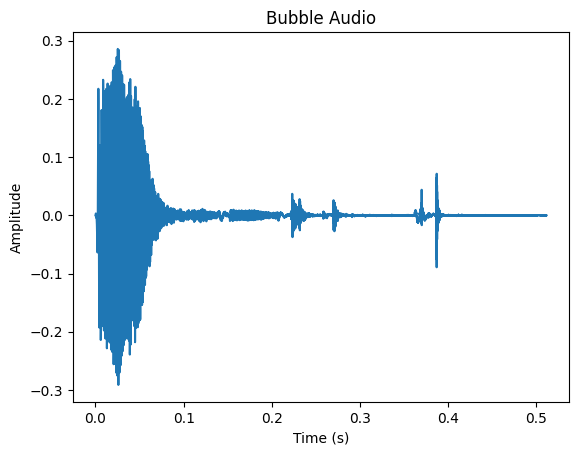

In [3]:
duration = len(bubble) / bubble_sr
time = np.linspace(0, duration, len(bubble))

plt.plot(time, bubble)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Bubble Audio')
plt.show()

4. (Basic) Plot the magnitude spectrum and spectrogram using both linear and dB scaling for the y-axis.

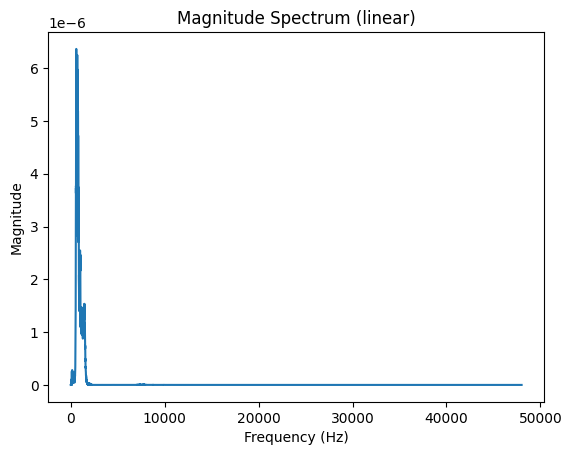

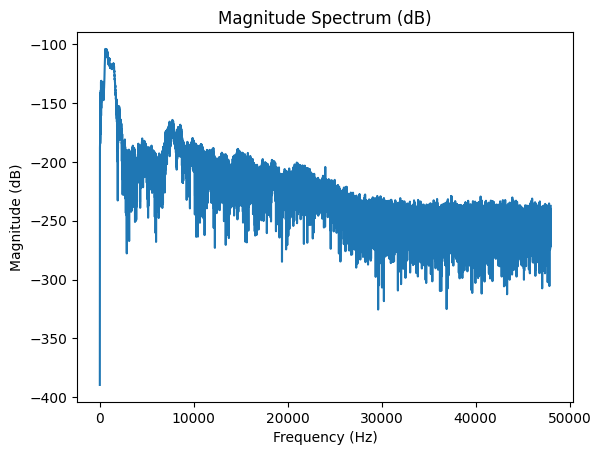

In [4]:
freq, spectrum = signal.periodogram(bubble, fs=bubble_sr)

plt.plot(freq, spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum (linear)')
plt.show()

spectrum_db = 20 * np.log10(spectrum)
plt.plot(freq, spectrum_db)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Magnitude Spectrum (dB)')
plt.show()

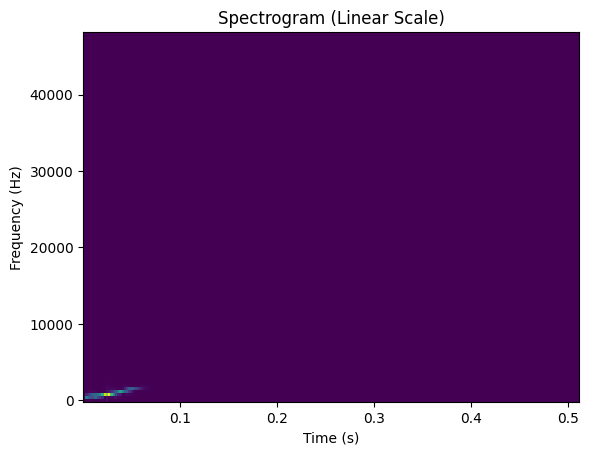

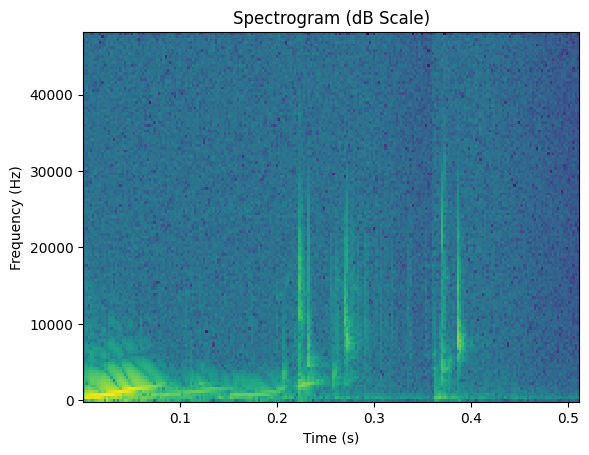

In [7]:
frequencies, times, spectrogram = signal.spectrogram(bubble, fs=bubble_sr)

plt.pcolormesh(times, frequencies, spectrogram)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram (Linear Scale)')
plt.show()

spectrogram_db = 10 * np.log10(spectrogram)
plt.pcolormesh(times, frequencies, spectrogram_db)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram (dB Scale)')
plt.show()

5. (Expected) Implement the decaying sinusoid model described in the paper for the sound generation of an individual bubble sound. 

6. (Expected) Recreate the sounds used in the user study based. 

7. (Expected) Implement and plot the output of the Poisson process for bubble creation described in the paper. This question just models the event times for the bubbles 

8. (Expected) Implement the full bubble simulator as described in the paper 

9. (Advanced) Create a few "presets" by adjusting the creation rates for different sized bubbles. The paper mentions: "An enormous variety of waterlike sounds can be created with the simulator, ranging from intimate
dripping sounds to torrential rains or waterfalls." Show audio examples of your simulator supporting this statement. 

10. (Advanced) Create a buffered implementation of your system suitable for real-time synthesis. You don't need to implement an actual real-time system with a GUI but your simulator should work by producing samples in short fixed buffer sizes without artifacts. Of course if can implement a real-time version if you choose to do so. 